# Accessing non-SNOTEL met site data from the SnowEx period

## imports

In [22]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git
    
import driveanon
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## load in datasets, format, and append to single dataframe

In [4]:
#for accessing google drive data, blob ids and downloading
blob_ids = ['1Ioh1huZZpIJLRtoyGvWZfvJkaSQh0-QS', #to get site locations
            '1YT9bNveID55Lo5j4upMGrA7vEl5FWXp_', #Mesa West .csv
            '1v2zUMtjBSohk0OX6WCirZYkddysLiZY7', #GMSP .csv
            '1cwIsJQ5kCVcHpw6pRgywf6TKsmeg2RZC' #Mesa East .csv
            ] 
            #'', 
            #'' ] #Mesa Middle .csv
    
for blob_id in blob_ids:
    f = driveanon.save(blob_id)

In [23]:
#load in csv files and trim to relevant variables
files = ['MW-V7_clean.csv','GMSP-V2.csv','ME-V3.csv']
cols = ['station_id','Datetime_UTC','latitude','longitude','AirTC_10ft_Avg_C','IRtarget_nadir2_C_Avg','SnowDepth_m',
        'TCstringC_s50cm_Avg','TCstringC_s10cm_Avg','TCstringC_0cm_Avg',
        'TCstringC_10cm_Avg','TCstringC_50cm_Avg','TCstringC_100cm_Avg',
        'TCstringC_200cm_Avg'];

#date range for trimming
start_date = datetime.datetime(2020,1,1,0,0)
end_date = datetime.datetime(2020,3,31,23,59)

DF = pd.DataFrame(columns=cols)
for file in files:
    station = file[:-4]
    
    #hard coded this in cause I ran out of patience
    if station[:2] == 'GM':
        lat = 39.05084
        lon = -108.06144
    elif station[:2] == 'MM':
        lat = 39.03954
        lon = -107.94174
    elif station[:2] == 'ME':
        lat = 39.10358
        lon = -107.88383
    elif station[:2] == 'MW':
        lat = 39.03388
        lon = -108.21399
        
    df = pd.read_csv('./'+file)
    
    #converts any NAN text to NaN and numeric columns (fixes error raised)
    for (columnName, columnData) in df.iteritems():
        df[columnName] = pd.to_numeric(df[columnName],errors='coerce')
    
    #create and add site column
    df.insert(0,'station_id',station)
    
    #add 
    df.insert(1, 'latitude', lat)
    df.insert(2, 'longitude', lon)
    
    #create and add datetime column
    full_dates = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['Day'], hour = df['Hour'], minute = df['Minute']))
    df.insert(3, 'Datetime_UTC', full_dates)
    
    #trim to study period (January - March 2020)
    mask = (df['Datetime_UTC'] > start_date) & (df['Datetime_UTC'] <= end_date)
    df = df.loc[mask]
    
    #trim to necessary columns
    df = df[cols]
    
    #append data frame
    DF = DF.append(df, ignore_index=True)
    
DF.shape

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (11,22,23,24,25,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types.Specify dtype

(29934, 14)

In [24]:
DF.head()

,station_id,Datetime_UTC,latitude,longitude,AirTC_10ft_Avg_C,IRtarget_nadir2_C_Avg,SnowDepth_m,TCstringC_s50cm_Avg,TCstringC_s10cm_Avg,TCstringC_0cm_Avg,TCstringC_10cm_Avg,TCstringC_50cm_Avg,TCstringC_100cm_Avg,TCstringC_200cm_Avg
0,MW-V7_clean,2020-01-01 00:10:00,39.03388,-108.21399,-10.05,-9.63,0.832106,0.659,-0.693,-1.211,-1.833,-6.174,-14.28,-11.11
1,MW-V7_clean,2020-01-01 00:20:00,39.03388,-108.21399,-10.09,-9.92,0.833106,0.650,-0.694,-1.214,-1.840,-6.195,-14.59,-11.06
2,MW-V7_clean,2020-01-01 00:30:00,39.03388,-108.21399,-10.47,-10.28,0.832106,0.641,-0.698,-1.216,-1.849,-6.211,-15.52,-11.63
3,MW-V7_clean,2020-01-01 00:40:00,39.03388,-108.21399,-11.63,-11.18,0.830106,0.636,-0.704,-1.221,-1.852,-6.220,-17.17,-13.03
4,MW-V7_clean,2020-01-01 00:50:00,39.03388,-108.21399,-12.26,-12.20,0.831106,0.635,-0.707,-1.225,-1.850,-6.225,-17.43,-13.51


In [25]:
DF.nunique()

station_id                   3
Datetime_UTC             13079
latitude                     3
longitude                    3
AirTC_10ft_Avg_C          8116
IRtarget_nadir2_C_Avg     9048
SnowDepth_m                894
TCstringC_s50cm_Avg       7614
TCstringC_s10cm_Avg       1186
TCstringC_0cm_Avg         1678
TCstringC_10cm_Avg        2315
TCstringC_50cm_Avg        5126
TCstringC_100cm_Avg       6840
TCstringC_200cm_Avg       8591
dtype: int64

In [26]:
DF['station_id'].value_counts()

MW-V7_clean    13096
GMSP-V2        13095
ME-V3           3743
Name: station_id, dtype: int64

## Use DF dataframe to add sites to plot (3 unique sites), and add to ERA comparison plots

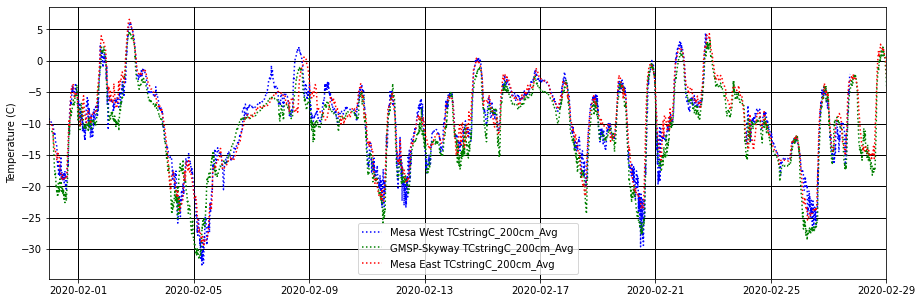

In [68]:
## old method ##
#colors = {'MW-V7_clean':1, 'GMSP-V2.csv':2, 'ME-V3':3} 
#plt.scatter(DF['Datetime_UTC'],DF['AirTC_10ft_Avg_C'],c=DF['station_id'].map(colors),s=5,marker='x',cmap='brg')
variable = 'TCstringC_200cm_Avg'

MW = DF[DF['station_id'] == 'MW-V7_clean']
GMSP = DF[DF['station_id'] == 'GMSP-V2']
ME = DF[DF['station_id'] == 'ME-V3']

plt.figure(figsize=(15,5))
plt.plot(MW['Datetime_UTC'], MW[variable], color='b',linestyle = ':',label='Mesa West ' + variable)
plt.plot(GMSP['Datetime_UTC'], GMSP[variable], color='g',linestyle = ':',label='GMSP-Skyway ' + variable)
plt.plot(ME['Datetime_UTC'], ME[variable], color='r',linestyle = ':',label='Mesa East ' + variable)
plt.ylabel('Temperature (C)')

#to trim by date
d1 = datetime.datetime(year=2020,month=1,day=31)
d2 = datetime.datetime(year=2020,month=2,day=29)
delta = d2 - d1

plt.xlim(d1,d2)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.legend()
plt.savefig('./images/mesa_sites_T2m.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

In [28]:
#read in PitSurfaceTemperatures.csv (see QueryPractice to show how to save these as a .csv)
f = 'PitSurfaceTemps.csv'
pitMax_df = pd.read_csv('./'+f)
pitMax_df.head()

,site_name,site_id,date,time,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)


In [29]:
#add datetime column
pit_datestr = pitMax_df['date'] + ' ' + pitMax_df['time']
pit_dates =  pd.to_datetime(pitMax_df['date'] + ' ' + pitMax_df['time'])#, format='%d%b%Y:%H:%M:%S.%f')
pitMax_df.insert(4, 'Datetime_UTC', pit_dates.dt.tz_localize(None)+datetime.timedelta(hours=6))
#remove timezone from datetime

#pitMax_df['Datetime_UTC'] = pitMax_df['Datetime_UTC'].replace(tzinfo=None)
pitMax_df.head()

,site_name,site_id,date,time,Datetime_UTC,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,2020-02-05 19:40:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,2020-02-05 15:45:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,2020-02-05 15:22:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,2020-02-05 19:15:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,2020-02-05 16:20:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)


## Get ERA5 2m air temperature data

In [30]:
!pip install -q cdsapi

In [31]:
import cdsapi

In [32]:
c = cdsapi.Client()

In [33]:
c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': [
            '2m_temperature', 'snow_albedo', 'snow_density',
            'snow_depth', 'snow_depth_water_equivalent', 'temperature_of_snow_layer',
            'total_precipitation',
        ],
        'year': '2020',
        'month': [
            '01', '02', '03',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            39.2, -108.4, 38.8,
            -107.7,
        ],
    },
    'data/era5_2020-02-01_2020-02-29.nc')

/srv/conda/envs/notebook/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-07-16 14:54:46,808 INFO Welcome to the CDS
2021-07-16 14:54:46,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
/srv/conda/envs/notebook/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-07-16 14:54:46,992 INFO Request is completed
2021-07-16 14:54:46,993 INFO Downloading https://download-0004.copernicus-climate.eu/cache-compute-0004/cache/data

Result(content_length=1234524,content_type=application/x-netcdf,location=https://download-0004.copernicus-climate.eu/cache-compute-0004/cache/data2/adaptor.mars.internal-1626380370.3270564-23995-1-57f54bff-8d6d-445a-91df-c7f43a2d3625.nc)

In [34]:
import xarray as xr
import numpy as np

In [49]:
ds = xr.open_dataset('data/era5_2020-02-01_2020-02-29.nc')

In [50]:
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 8, time: 2184)
Coordinates:
  * longitude  (longitude) float32 -108.4 -108.3 -108.2 ... -107.9 -107.8 -107.7
  * latitude   (latitude) float32 39.2 39.1 39.0 38.9 38.8
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-03-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    asn        (time, latitude, longitude) float32 ...
    rsn        (time, latitude, longitude) float32 ...
    sde        (time, latitude, longitude) float32 ...
    sd         (time, latitude, longitude) float32 ...
    tsn        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-15 20:20:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...


In [51]:
ds['t2m'].values = ds['t2m'].values - 273.15
ds['t2m'].attrs['units'] = 'C'
ds['t2m'].attrs['long_name'] = 'Temperature (2 m above surface)'

In [52]:
ds['t2m'].mean(dim=('latitude', 'longitude'))

<xarray.DataArray 't2m' (time: 2184)>
array([ -8.138548, -10.165667, -11.763773, ...,  10.650542,  10.910386,
         9.771515], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-03-31T23:00:00

In [53]:
ds['t2m'].time

<xarray.DataArray 'time' (time: 2184)>
array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', ..., '2020-03-31T21:00:00.000000000',
       '2020-03-31T22:00:00.000000000', '2020-03-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-03-31T23:00:00
Attributes:
    long_name:  time

In [64]:
T = [t - np.timedelta64(0, 'h') for t in ds['time'].values] #convert to correct time

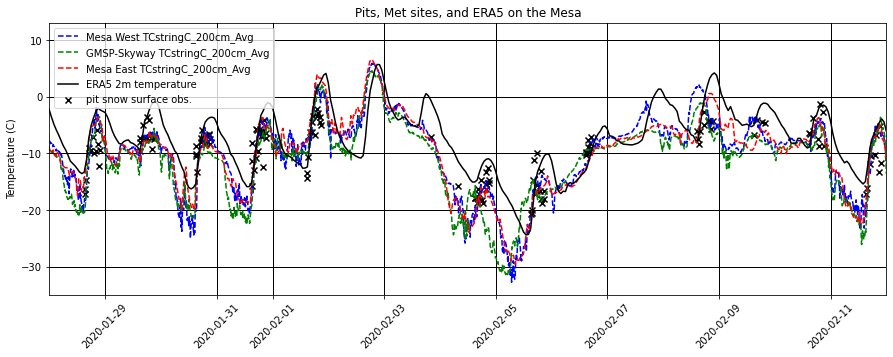

In [67]:
# SAME PLOT AS ABOVE BUT WITH SNOW PIT SURFACE TEMPS
variable = 'TCstringC_200cm_Avg'

MW = DF[DF['station_id'] == 'MW-V7_clean']
GMSP = DF[DF['station_id'] == 'GMSP-V2']
ME = DF[DF['station_id'] == 'ME-V3']

plt.figure(figsize=(15,5))
plt.plot(MW['Datetime_UTC'], MW[variable], color='b',linestyle = '--',label='Mesa West ' + variable)
plt.plot(GMSP['Datetime_UTC'], GMSP[variable], color='g',linestyle = '--',label='GMSP-Skyway ' + variable)
plt.plot(ME['Datetime_UTC'], ME[variable], color='r',linestyle = '--',label='Mesa East ' + variable)
#ERA5
plt.plot(T,ds['t2m'].mean(dim=('latitude', 'longitude')),color='k',linestyle = '-',label='ERA5 2m temperature')
plt.ylabel('Temperature (C)')
plt.scatter(pitMax_df['Datetime_UTC'],pitMax_df['temperature_C'],c='k',marker='x',label='pit snow surface obs.')
plt.xticks(rotation=45)
plt.title('Pits, Met sites, and ERA5 on the Mesa')

#to trim by date
d1 = datetime.datetime(year=2020,month=1,day=28)
d2 = datetime.datetime(year=2020,month=2,day=12)
delta = d2 - d1

plt.xlim(d1,d2)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.legend()
plt.savefig('./images/mesa_sites_T2m_ERA5.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

## Plotting sites on a map (from geospatial cookbook tutorial)

In [3]:
import os
import requests
import rasterio as rio
import pandas as pd
from rasterio import plot, mask
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [4]:
gm_bounds = [-108.34115668,   38.82320553, -107.72839859,   39.19563035]

In [5]:
#List of all products hosted by OpenTopography GlobalDEM API
demtype_list = ["SRTMGL3", "SRTMGL1", "SRTMGL1_E", "AW3D30", "AW3D30_E", "SRTM15Plus"]

In [6]:
#1 arcsec
demtype = "SRTMGL1_E"

In [7]:
base_url="https://portal.opentopography.org/API/globaldem?demtype={}&west={}&south={}&east={}&north={}&outputFormat=GTiff"

In [8]:
base_url.format(demtype, *gm_bounds)

'https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1_E&west=-108.34115668&south=38.82320553&east=-107.72839859&north=39.19563035&outputFormat=GTiff'

In [9]:
#Paste API key below (from user account)
api_key = '3aac84dd977e73caac74f991bce4656c'
if api_key:
    demtype_list.extend(['NASADEM', 'COP30', 'COP90'])
    demtype = 'COP30'

In [10]:
def get_OT_GlobalDEM(demtype, bounds, out_fn=None, api_key=None):
    if out_fn is None:
        out_fn = '{}.tif'.format(demtype)
    
    if not os.path.exists(out_fn):
        #Prepare API request url
        #Bounds should be [minlon, minlat, maxlon, maxlat]
        url = base_url.format(demtype, *bounds)
        if api_key is not None:
            url = f'{url}&API_Key={api_key}'
        print(url)
        #Get
        response = requests.get(url)
        #Should check for 200
        #Write to disk
        open(out_fn, 'wb').write(response.content)

In [11]:
out_fn = f"GM_{demtype}.tif"
out_fn

'GM_COP30.tif'

In [12]:
get_OT_GlobalDEM(demtype, gm_bounds, out_fn, api_key)

In [13]:
!ls -lh $out_fn

-rw-rw-r-- 1 jovyan users 12M Jul 16 03:29 GM_COP30.tif


In [14]:
#convert met site data to a geodataframe for plotting with DEM basemap
met_sites = pd.read_csv('./MesaMetSites.csv')
#met_sites['geometry'] = [Point(row['longitude'], row['latitude']) for row in met_sites]
met_sites_gdf = gpd.GeoDataFrame(met_sites, geometry=gpd.points_from_xy(met_sites.longitude, met_sites.latitude))
met_sites_gdf.head()

,siteName,siteShortName,latitude,longitude,elev_m,start,end,geometry
0,LSOS,LSOS,39.05225,-108.09792,2974,10/9/16 18:20,5/17/17 15:40,POINT (-108.09792 39.05225)
1,Mesa East,ME,39.10358,-107.88383,2750,10/10/16 16:30,7/28/20 11:30,POINT (-107.88383 39.10358)
2,Mesa West,MW,39.03388,-108.21399,3033,10/9/16 21:00,7/8/20 17:00,POINT (-108.21399 39.03388)
3,Mesa Middle,MM,39.03954,-107.94174,3176,10/10/16 19:00,6/9/20 20:10,POINT (-107.94174 39.03954)
4,Skyway,GMSP,39.05084,-108.06144,3234,10/10/16 0:50,7/19/20 5:50,POINT (-108.06144 39.05084)


In [15]:
met_sites_gdf.crs = 4236
met_sites_gdf.crs

<Geographic 2D CRS: EPSG:4236>
Name: Hu Tzu Shan 1950
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Taiwan, Republic of China - onshore - Taiwan Island, Penghu (Pescadores) Islands.
- bounds: (119.25, 21.87, 122.06, 25.34)
Datum: Hu Tzu Shan 1950
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

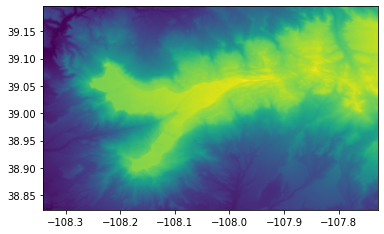

In [16]:
with rio.open(out_fn) as src:
    rio.plot.show(src)

In [21]:
import hvplot.pandas
from geoviews import tile_sources as gvts
#met_sites_gdf.hvplot(hover_cols=['index','name'])
map_tiles = gvts.EsriImagery
map_tiles * met_sites_gdf.to_crs('EPSG:3857').hvplot(hover_cols=['index','siteName'])

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [x,y]   (index,siteName)

NameError: name 'plt' is not defined